# 🩺 Diabetes Prediction Using Machine Learning
## 🔍 Problem Definition

Stark Health Clinic seeks to proactively combat the rising prevalence of diabetes by predicting individuals at high risk before onset. 
As a Data Scientist, My role is to build a robust machine learning pipeline capable of identifying such individuals from patient data. 
Early detection will allow for timely intervention, better patient care, reduced healthcare costs,
and enhanced public health outcomes.

## 🎯 Objective

To develop a supervised learning model that accurately predicts the likelihood of diabetes onset based on key health indicators. This model will support clinical decision-making and resource allocation, enabling:

- Timely intervention for high-risk individuals. 
- Reduced long-term treatment costs.  
- Improved patient outcomes through preventive care. 
- Enhanced operational efficiency in healthcare management.

## 📊 Exploratory Data Analysis (EDA)

The project includes an in-depth EDA process with the following:

- Univariate Analysis
- Bivariate Analysis  
- Multivariate Analysis  
- Target Variable Relationship 
- Correlation Matrix

## 🧠 Feature Engineering

- Encoding: Applied label and one-hot encoding for categorical variables  
- New Features: Created derived features based on domain insights (e.g., age bins, BMI categories)  
- Scaling: Standardization and normalization applied to numerical features where necessary

## 🤖 Model Selection, Training & Validation

Three supervised machine learning models were developed and tuned:
XGB Classifier
Random Forest
K-Nearest Neighbours
SGD Classifier
Naive Bayes
Decision Tree
Logistic Regression

- **Train-Test Split**: Used an 80/20 split with stratification to handle class imbalance  
- **Cross-Validation**: Performed to ensure robust performance and avoid overfitting

## 📈 Model Evaluation

Key performance metrics analyzed:

- **Accuracy**
- **Precision, Recall, and F1-Score**
- **Confusion Matrix**
- **ROC-AUC Score**

### Business Insight:
Given the healthcare context, **recall (true positive rate)** is prioritized to minimize **false negatives**—i.e., failing to identify individuals who do have diabetes. Missing such patients poses a higher risk than mistakenly flagging low-risk patients.

## 🧩 Challenges Faced

- **Class imbalance**: Addressed using stratified sampling and model-specific techniques  
- **Missing data**: Cleaned and imputed appropriately based on feature type  
- **Feature relevance**: Needed domain knowledge to engineer meaningful variables
- **Inconsistencies in the some columns**: Cleaned 




# Feature Definitions
gender: Patient's gender (e.g., Male, Female, Other).

age: Patient's age. Includes decimals for infants (e.g., 0.7 years).

cleaned_age: Cleaned, Rounded and standardized version of age.

age_group: Age category based on cleaned_age 

hypertension: Indicates whether the patient has high blood pressure.

0 = No

1 = Yes

heart_disease: Indicates whether the patient has heart disease.

0 = No

1 = Yes

smoking_history: Patient’s smoking status.

bmi: Body Mass Index — a value derived from weight and height to classify underweight, normal, overweight, or obesity.

HbA1c_level: Average blood sugar level over the past 2–3 months.

blood_glucose_level: Most recent or current blood sugar measurement.

diabetes: Indicates if the patient has been diagnosed with diabetes.

0 = No

1 = Yes



In [1]:
# Import necessary Libraries 

# For Data Analysis 
import pandas as pd 
import numpy as np

# For Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# For Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

# Classifier Libraries 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\noell\OneDrive\10 alytics\Computer Vision Project\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Feature Definitions
gender: Patient's gender (e.g., Male, Female, Other).

age: Patient's age. May include decimals for infants (e.g., 0.7 years).

cleaned_age: Rounded or standardized version of age used for grouping.

age_group: Age category based on cleaned_age (e.g., 0–5, 18–30).

hypertension: Indicates whether the patient has high blood pressure.

0 = No

1 = Yes

heart_disease: Indicates whether the patient has heart disease.

0 = No

1 = Yes

smoking_history: Patient’s smoking status (e.g., never, former, current, not known).

bmi: Body Mass Index — a value derived from weight and height to classify underweight, normal, overweight, or obesity.

HbA1c_level: Average blood sugar level over the past 2–3 months (glycated hemoglobin).

blood_glucose_level: Most recent or current blood sugar measurement.

diabetes: Indicates if the patient has been diagnosed with diabetes.

0 = No

1 = Yes



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


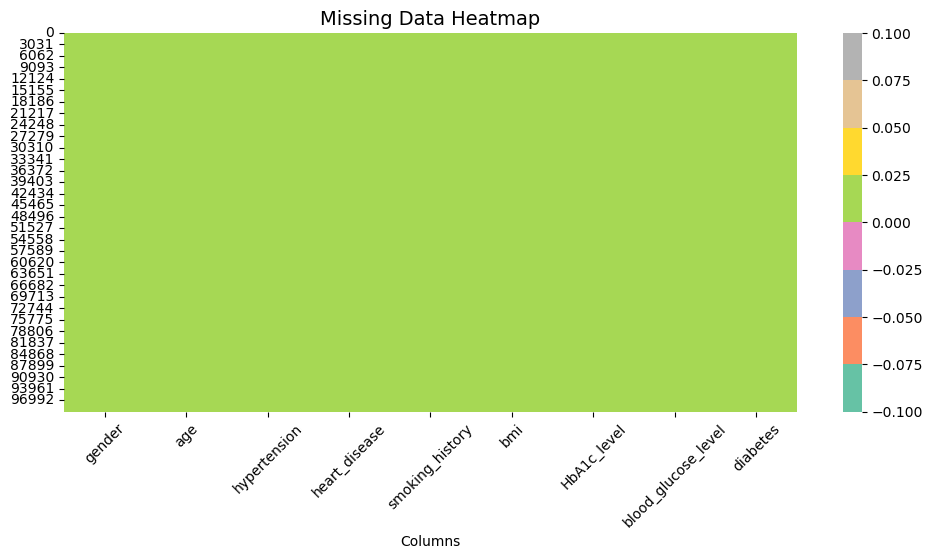

In [4]:
# Check for missing values

print(df.isna().sum())

# Visualizing the missing data 
palette = sns.color_palette("Set2", as_cmap=True)
plt.figure(figsize = (10,6))
sns.heatmap(df.isna(), cbar=True, cmap=palette)
plt.title("Missing Data Heatmap", fontsize=14)
plt.xlabel("Columns")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Narration

heatmap likely shows little to no missing data 

No missing data found

In [5]:
df.duplicated().sum()

3854

In [6]:
df[df.duplicated()].head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
4106,Female,51.0,0,0,No Info,27.32,6.6,200,0
4128,Female,80.0,0,0,never,27.32,5.7,85,0
4224,Male,80.0,1,0,former,27.32,6.2,130,0
4263,Male,80.0,0,0,No Info,27.32,6.0,100,0
4486,Male,50.0,0,0,No Info,27.32,4.8,155,0


In [7]:
# Drop duplicates and keep the first occurrence
cleaned_df = df.drop_duplicates()

In [8]:
print(cleaned_df['age'].unique())      # See unique age values
print(cleaned_df['age'].dtype)         # Check the data type

[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
float64


In [9]:
# Clean inconsistancy in age column
def clean_age(age):
    if age < 1:
        return round(age * 100)   # e.g. 0.08 → 8
    else:
        return round(age)         # e.g. 80.0 → 80

cleaned_df['cleaned_age'] = cleaned_df['age'].apply(clean_age)

# Confirm results
print("Min age:", cleaned_df['cleaned_age'].min())
print("Max age:", cleaned_df['cleaned_age'].max())
print(cleaned_df['cleaned_age'].unique())

Min age: 1
Max age: 88
[80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25  8 33 16 61 31 49 39 65 14 70 48 51
 71 88 64 63 52 10 35 23  1]


In [10]:
# Create Age Group 
def age_group(age):
    if age < 5:
        return "Under 5 (Babies)"
    elif age < 10:
        return "5–9 (Toddlers)"
    elif age < 18:
        return "10–17 (Children/Teens)"
    elif age < 30:
        return "18–29 (Young Adults)"
    elif age < 45:
        return "30–44 (Adults)"
    elif age < 60:
        return "45–59 (Middle-aged)"
    elif age < 75:
        return "60–74 (Seniors)"
    else:
        return "75+ (Elderly)"

cleaned_df['age_group'] = cleaned_df['cleaned_age'].apply(age_group)

# Preview the result
print(cleaned_df[['cleaned_age', 'age_group']].head())

   cleaned_age             age_group
0           80         75+ (Elderly)
1           54   45–59 (Middle-aged)
2           28  18–29 (Young Adults)
3           36        30–44 (Adults)
4           76         75+ (Elderly)


In [11]:
cleaned_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
cleaned_age              int64
age_group               object
dtype: object

In [12]:
cleaned_df.shape

(96146, 11)

In [13]:
cleaned_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
cleaned_age            0
age_group              0
dtype: int64

In [14]:
cleaned_df['smoking_history'] = cleaned_df['smoking_history'].replace({
    'not current': 'former',
    'ever': 'former',
    'No Info': 'unknown'
})                                              

cleaned_df['smoking_history'].value_counts()

smoking_history
never      34398
unknown    32887
former     19664
current     9197
Name: count, dtype: int64

### Narration
To simplify and standardize the smoking_history categorical values, we grouped similar categories:
	•	Merged 'ever', 'not current', and 'former' into a single category: former
	•	Renamed 'No Info' to unknown to retain missing information without dropping data
	•	Kept 'never' and 'current' as they are

# Exploratory Data Analysis

## Univariate Analysis

In [15]:
cleaned_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,cleaned_age
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220,42.288395
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616,22.242262
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000,24.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,43.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000,60.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,88.000000


In [16]:
cleaned_df.describe(include='object')

,gender,smoking_history,age_group
count,96146,96146,96146
unique,3,4,8
top,Female,never,45–59 (Middle-aged)
freq,56161,34398,21968


In [17]:
cleaned_df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,cleaned_age,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,80,75+ (Elderly)
1,Female,54.0,0,0,unknown,27.32,6.6,80,0,54,45–59 (Middle-aged)
2,Male,28.0,0,0,never,27.32,5.7,158,0,28,18–29 (Young Adults)


In [18]:
cleaned_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'cleaned_age',
       'age_group'],
      dtype='object')

hypertension
0    88685
1     7461
Name: count, dtype: int64
[0 1]


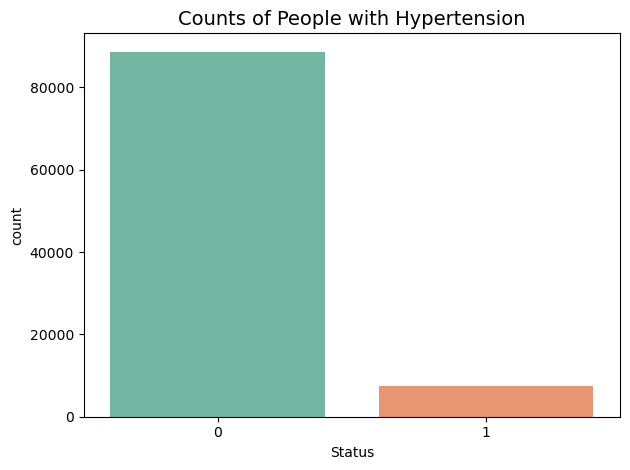

In [19]:
# Counts of Hypertension 
print(cleaned_df["hypertension"].value_counts())
print(cleaned_df["hypertension"].unique())

sns.countplot(x=cleaned_df["hypertension"], palette = "Set2")
plt.title("Counts of People with Hypertension", fontsize=14)
plt.xlabel("Status")
plt.tight_layout()
plt.show()

### Narration
The bar plot shows most individuals do not have hypertension, with a smaller group diagnosed with the condition.

heart_disease
0    92223
1     3923
Name: count, dtype: int64
[1 0]


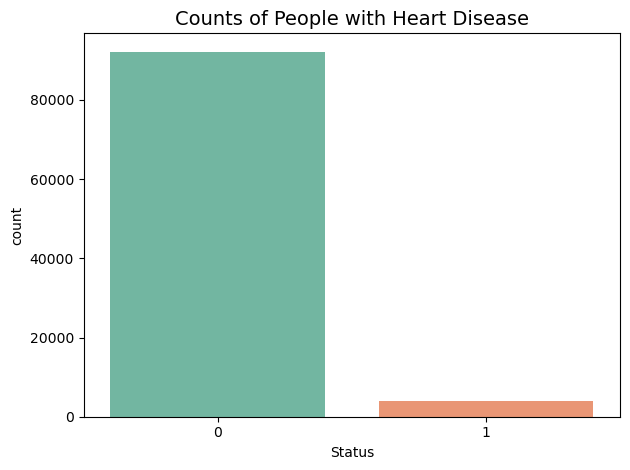

In [20]:
# Counts of Heart Disease 
print(cleaned_df["heart_disease"].value_counts())
print(cleaned_df["heart_disease"].unique())

sns.countplot(x=cleaned_df["heart_disease"], palette = "Set2")
plt.title("Counts of People with Heart Disease", fontsize=14)
plt.xlabel("Status")
plt.tight_layout()
plt.show()

### Narration 
The bar plot shows that most individuals do not have heart disease, while a small portion are diagnosed with the condition.

smoking_history
never      34398
unknown    32887
former     19664
current     9197
Name: count, dtype: int64
['never' 'unknown' 'current' 'former']


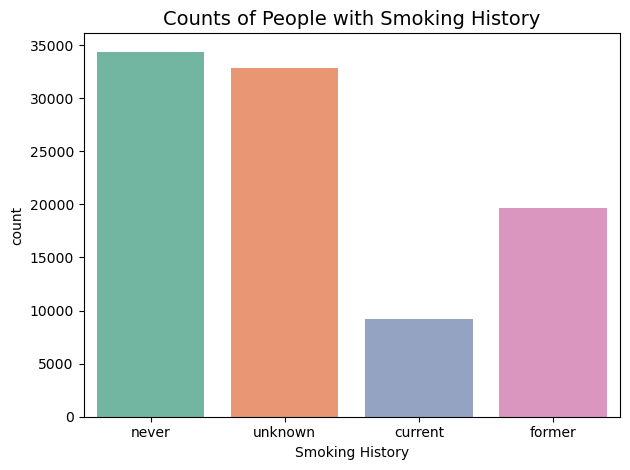

In [21]:
# Counts of Hypertension 
print(cleaned_df["smoking_history"].value_counts())
print(cleaned_df["smoking_history"].unique())

sns.countplot(x=cleaned_df["smoking_history"], palette = "Set2")
plt.title("Counts of People with Smoking History", fontsize=14)
plt.xlabel("Smoking History")
plt.tight_layout()
plt.show()

### Narration
The bar plot reveals that most individuals have never smoked or have no smoking information available. Smaller groups include current smokers, former smokers, and those with varied smoking histories.

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
['Female' 'Male' 'Other']


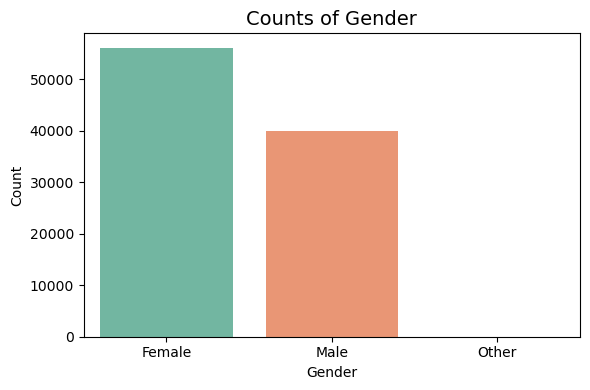

In [22]:
# Counts of Gender
print(cleaned_df["gender"].value_counts())
print(cleaned_df["gender"].unique())

# Create and export gender count plot
plt.figure(figsize=(6, 4))
sns.countplot(x=cleaned_df["gender"], palette="Set2")
plt.title("Counts of Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Gender_Counts.png", dpi=300)  # Save high-res image
plt.show()


### Narration
The bar plot shows a higher number of females than males, with a very small representation of others.
others could be people didnt want to give their gender or any change of organs that has happened in their life.

diabetes
0    87664
1     8482
Name: count, dtype: int64
[0 1]


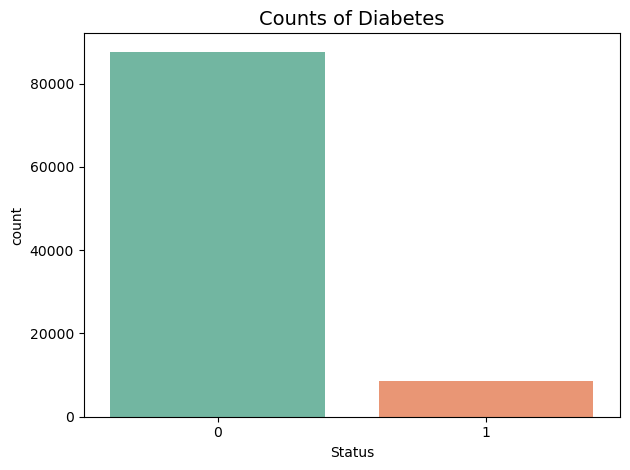

In [23]:
# Counts of Hypertension 
print(cleaned_df["diabetes"].value_counts())
print(cleaned_df["diabetes"].unique())

sns.countplot(x=cleaned_df["diabetes"], palette = "Set2")
plt.title("Counts of Diabetes", fontsize=14)
plt.xlabel("Status")
plt.tight_layout()
plt.show()

### Narration
The bar plot shows most individuals are non-diabetic, with a smaller yet notable group diagnosed with diabetes, indicating a clear at-risk segment.

age_group
45–59 (Middle-aged)       21968
30–44 (Adults)            19363
60–74 (Seniors)           15813
18–29 (Young Adults)      14573
75+ (Elderly)              8556
10–17 (Children/Teens)     7242
5–9 (Toddlers)             4368
Under 5 (Babies)           4263
Name: count, dtype: int64
['75+ (Elderly)' '45–59 (Middle-aged)' '18–29 (Young Adults)'
 '30–44 (Adults)' '60–74 (Seniors)' '10–17 (Children/Teens)'
 '5–9 (Toddlers)' 'Under 5 (Babies)']


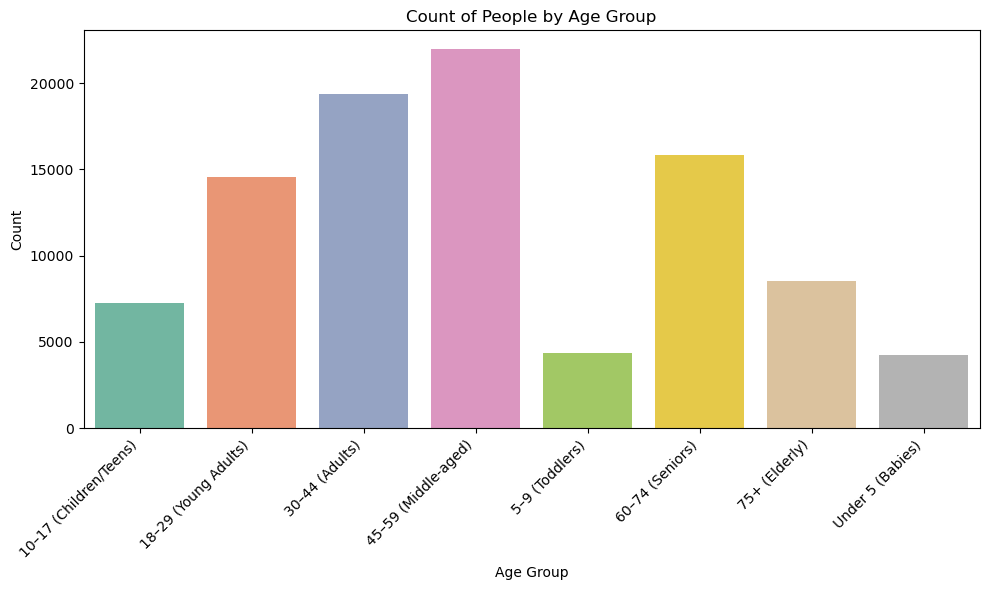

In [24]:
print(cleaned_df["age_group"].value_counts())
print(cleaned_df["age_group"].unique())
# Count number of people in each age group
age_counts = cleaned_df['age_group'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="Set2")

plt.xticks(rotation=45, ha='right')  # rotate labels for readability
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of People by Age Group')
plt.tight_layout()
plt.show()

### Narration

The bar plot shows the distribution of individuals across different age groups. The largest group is middle-aged adults (45–59), followed by adults (30–44) and seniors (60–74). Young adults and elderly groups also make up a significant portion, while the population under 18 steadily declines with age. This highlights a predominantly adult-centric dataset, with fewer entries from younger age brackets.

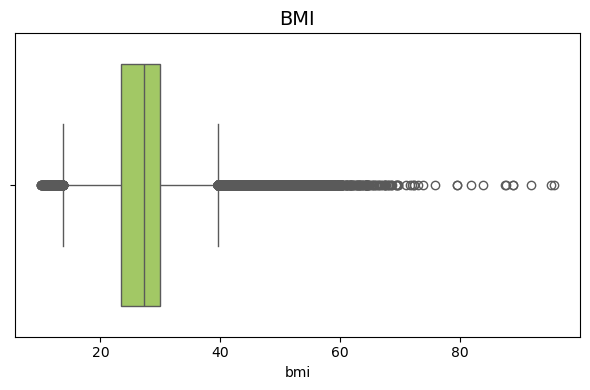

In [25]:
# Check for outliers BMI
plt.figure(figsize=(6, 4))
sns.boxplot(x=cleaned_df["bmi"], color=sns.color_palette("Set2")[4])
plt.title("BMI", fontsize=14)
plt.tight_layout()
plt.savefig("BMI_Boxplot.png", dpi=300)  # Save as PNG for PowerPoint
plt.show()

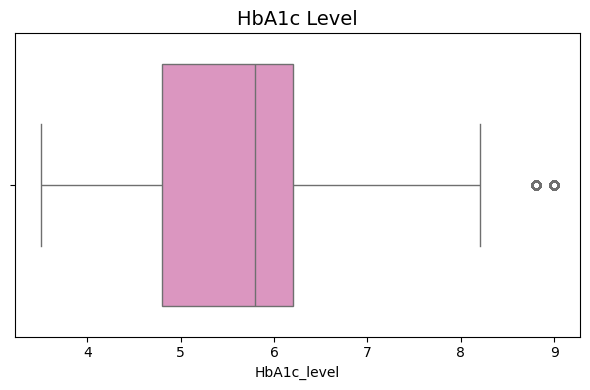

In [26]:
# Check for outliers HbA1c_level
plt.figure(figsize=(6, 4))
sns.boxplot(x=cleaned_df["HbA1c_level"], color=sns.color_palette("Set2")[3])
plt.title("HbA1c Level", fontsize=14)
plt.tight_layout()
plt.savefig("HbA1c_Boxplot.png", dpi=300)  # Save high-res image
plt.show()


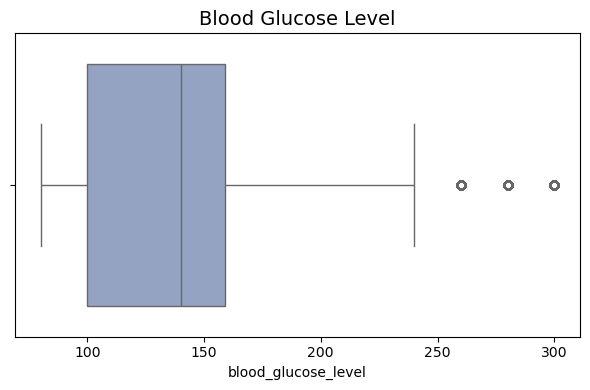

In [27]:
# Check for outliers Blood Glucose Level
plt.figure(figsize=(6, 4))
sns.boxplot(x=cleaned_df["blood_glucose_level"], color=sns.color_palette("Set2")[2])
plt.title("Blood Glucose Level", fontsize=14)
plt.tight_layout()
plt.savefig("Blood_Glucose_Boxplot.png", dpi=300)
plt.show()


In [28]:
# Outliers values 

columns_to_check = ['blood_glucose_level', 'HbA1c_level', 'bmi']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\nLower Bound:", lower_bound)
    print(f"\nUpper Bound:", upper_bound)
    print(f"\nOutliers in {col}:")
    print(outliers.values if not outliers.empty else "No outliers found.")


Lower Bound: 11.5

Upper Bound: 247.5

Outliers in blood_glucose_level:
[260 300 280 ... 300 300 280]

Lower Bound: 2.6999999999999993

Upper Bound: 8.3

Outliers in HbA1c_level:
[9.  9.  8.8 ... 9.  9.  8.8]

Lower Bound: 14.705

Upper Bound: 38.504999999999995

Outliers in bmi:
[54.7  13.99 56.43 ... 60.52 45.15 40.69]


### Narration
1. Blood Glucose Level
Observation:
blood glucose_level(Recent or current blood sugar level)
These outliers are significantly above the upper bound, indicating some patients have extremely high blood glucose levels.
This could point to episodes of hyperglycemia.
Or potential data entry errors (e.g., unit inconsistencies).

Action: Review those cases individually — if valid, they may represent high-risk individuals.

2. HbA1c level (Average blood sugar level over the past 2–3 months)
Observation: These outliers are slightly above the upper bound  

Action: consider speaking to a dietitian, and check food habits.

3. bmi Body Mass Index (weight to height ratio used to classify underweight/obesity)
Observation:
Most outliers are high values. These indicate possible obesity. Low outliers means.
These are people with very low body weight for their height.Possible Malnutrition, Eating disorders (like anorexia), Hyperthyroidism, Chronic illness
Intense athletic training (in some cases).
High BMI (Outliers Above Upper Bound), These are people with significantly high body weight for their height.
Possible Obesity or severe obesity, Risk of metabolic syndrome, diabetes, and hypertension, Sedentary lifestyle, high calorie intake

Action: Low BMI increases risks like malnutrition and weak immunity; actions include a nutrient-rich diet, strength training, and medical support.
High BMI raises the risk of diabetes and heart disease; key actions are lifestyle changes, behavioral support, and possible medical or surgical intervention.
Both require tailored health strategies to manage and reduce long-term risks.

CONCLUSION
The analysis of health indicators reveals critical outliers in blood glucose, HbA1c, and BMI levels. Elevated blood glucose and HbA1c suggest risks of hyperglycemia and poor long-term sugar control, warranting individual case reviews and lifestyle interventions. Similarly, extreme BMI values highlight both undernutrition and obesity risks. Targeted medical evaluations, dietary improvements, and behavioural support are essential to address these issues and promote healthier outcomes across the population.


## Bivariate Analysis

In [29]:
cleaned_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'cleaned_age',
       'age_group'],
      dtype='object')

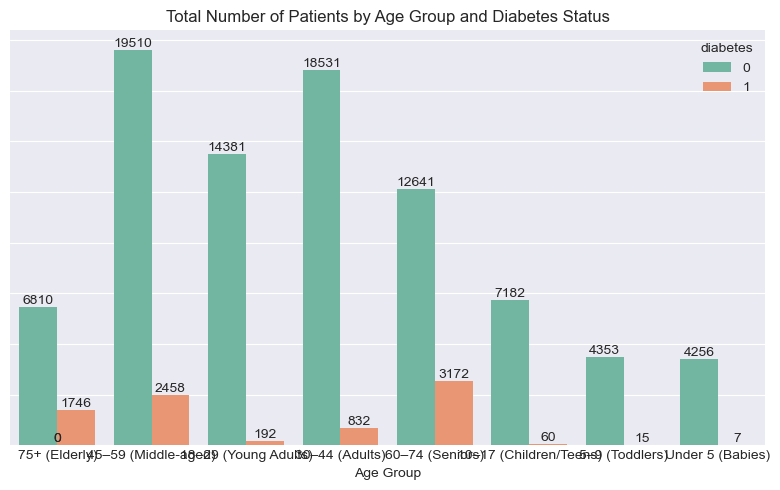

In [71]:
# Distribution of Age Group by Diabetes status 

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cleaned_df, x='age_group', palette='Set2', hue='diabetes')

# Remove y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', left=False, labelleft=False)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title("Total Number of Patients by Age Group and Diabetes Status")
plt.xlabel("Age Group")
plt.tight_layout()
plt.savefig("AgeGroup_Countplot.png", dpi=300)  # Export high-res image
plt.show()


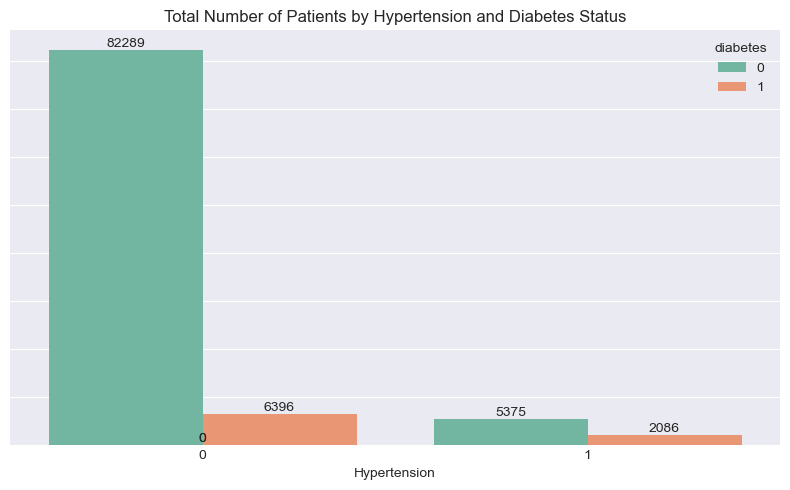

In [70]:
# Distribution of Hypertension by Diabetes status 

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cleaned_df, x='hypertension', palette='Set2', hue='diabetes')

# Remove y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', left=False, labelleft=False)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title("Total Number of Patients by Hypertension and Diabetes Status")
plt.xlabel("Hypertension")
plt.tight_layout()
plt.savefig("Hypertension_Countplot.png", dpi=300)  # Export high-res image
plt.show()

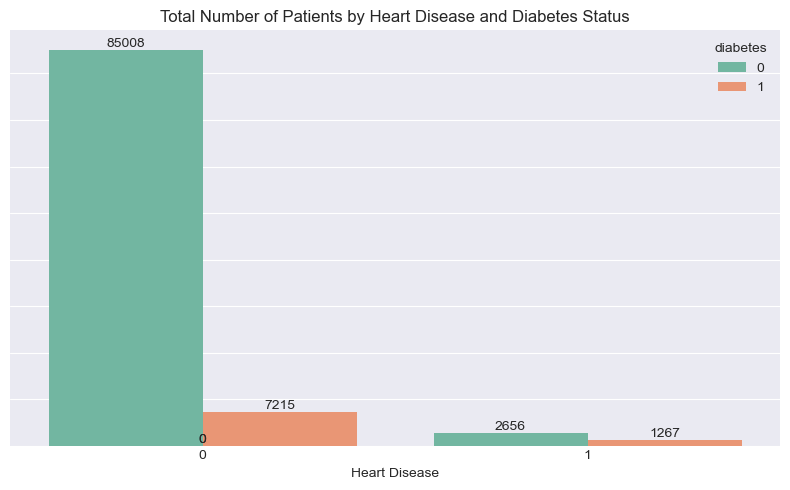

In [69]:
# Distribution of Heart Disease by Diabetes status 

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cleaned_df, x='heart_disease', palette='Set2', hue='diabetes')

# Remove y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', left=False, labelleft=False)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title("Total Number of Patients by Heart Disease and Diabetes Status")
plt.xlabel("Heart Disease")
plt.tight_layout()
plt.savefig("Heart_Disease_Countplot.png", dpi=300)  # Export high-res image
plt.show()

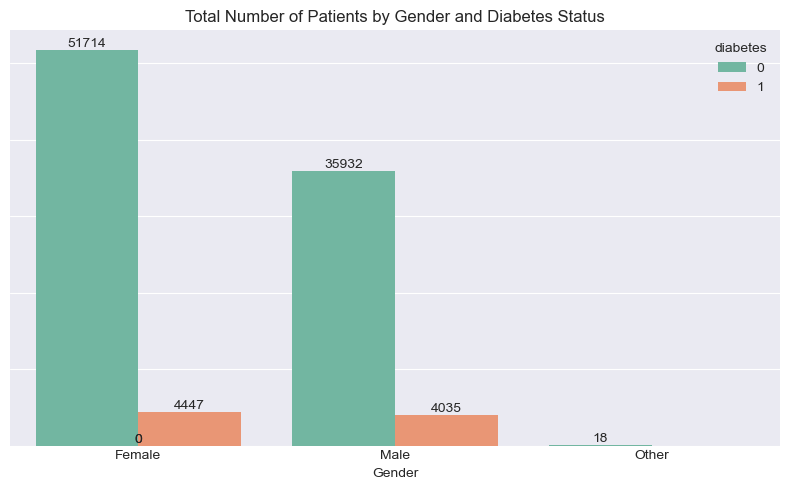

In [68]:
# Distribution of Heart Disease by Diabetes status 

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cleaned_df, x='gender', palette='Set2', hue='diabetes')

# Remove y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', left=False, labelleft=False)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title("Total Number of Patients by Gender and Diabetes Status")
plt.xlabel("Gender")
plt.tight_layout()
plt.savefig("Gender_Countplot.png", dpi=300)  # Export high-res image
plt.show()

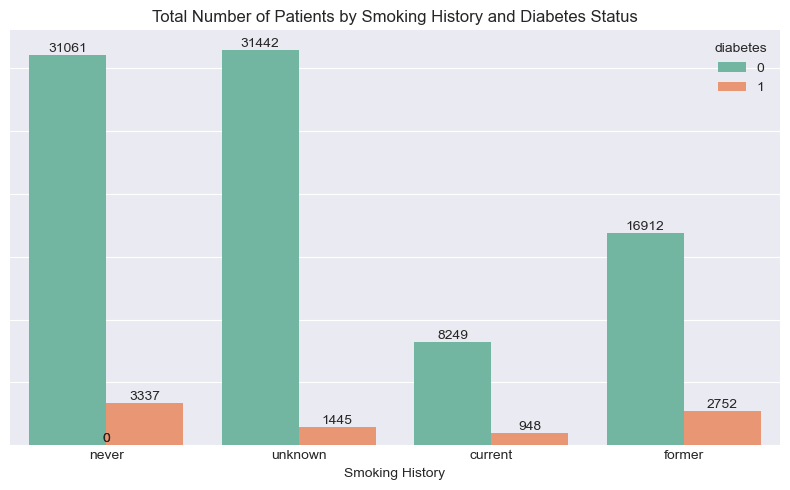

In [67]:
# Distribution of Heart Disease by Diabetes status 

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cleaned_df, x='smoking_history', palette='Set2', hue='diabetes')

# Remove y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', left=False, labelleft=False)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title("Total Number of Patients by Smoking History and Diabetes Status")
plt.xlabel("Smoking History")
plt.tight_layout()
plt.savefig("Smoking_History_Countplot.png", dpi=300)  # Export high-res image
plt.show()

### Narration
Gender:
	•	Diabetes prevalence is higher in males 10.1% compared to females 7.9%.
	•	A negligible number of patients were identified as “Other,” with no diabetic cases recorded in that category.

Smoking History:
	•	Former smokers had the highest diabetes prevalence 14.0%, followed by current smokers 10.3%.
	•	Patients who never smoked or had unknown smoking history showed lower prevalence rates 9.7% and 4.4%, respectively.

Heart Disease:
	•	Patients with heart disease exhibited a significantly higher diabetes rate 32.3%, compared to those without 7.8%.
	•	This suggests a strong clinical correlation between cardiovascular disease and diabetes.
Hypertension:
	•	Diabetes was more prevalent in patients with hypertension 27.9% than in those without 7.2%.
	•	Hypertension may be a key predictor or comorbidity in diabetic cases.

Conclusion:
The data reveals that diabetes prevalence is closely linked to specific health conditions and lifestyle factors. Notably:
	•	Hypertension, heart disease, and past smoking behavior show strong associations with diabetes.
	•	Male gender and current smoking also correlate with a higher risk of diabetes.

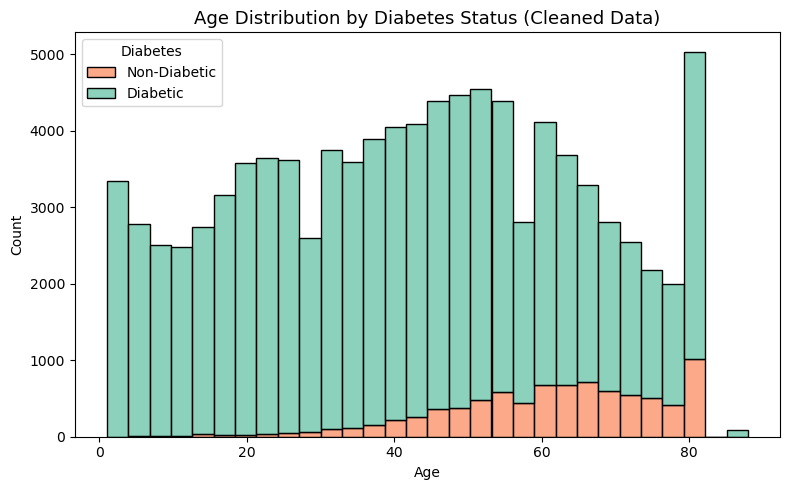

In [36]:
# Cleaned Age by Diabetes Status
plt.figure(figsize=(8, 5))

# Histogram by diabetes status
sns.histplot(data=cleaned_df, x='cleaned_age', hue='diabetes', bins=30, kde=False, palette='Set2', multiple='stack')

plt.title('Age Distribution by Diabetes Status (Cleaned Data)', fontsize=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.savefig("Cleaned_Age_Distribution.png", dpi=300)  # Save image
plt.show()


### Narration
Observations:

Gender: Diabetics are fairly evenly distributed between males and females, with slightly more diabetic males.

Smoking History: Most diabetics fall in the “never smoked” group, followed by former and current smokers.

Age Group: Diabetes is most prevalent in the 60–74 (Seniors) and 75+ (Elderly) groups. Notable cases are also seen in middle-aged (45–59) and adults (30–44). Very few cases occur under age 30, and it is rare in children.

Heart Disease: A higher proportion of diabetics have heart disease compared to non-diabetics.

Hypertension: Diabetics are more likely to have hypertension, indicating common co-occurrence.

Interpretation:

Diabetes is strongly associated with older age, heart disease, and hypertension, suggesting these are major risk factors or comorbidities.
While smoking may contribute to diabetes risk, its effect seems less direct, as many diabetics have never smoked.
Overall, age appears to be one of the strongest predictors, emphasizing the importance of early screening and monitoring in adults and seniors.



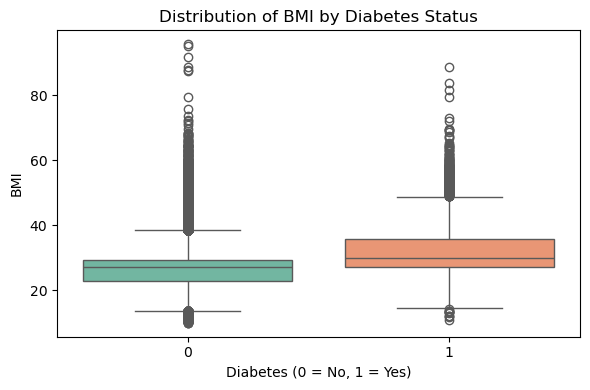

In [37]:
# BMI VS Diabetes 

plt.figure(figsize=(6, 4))
sns.boxplot(data=cleaned_df, x='diabetes', y='bmi', palette='Set2')
plt.title('Distribution of BMI by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig("BMI_by_Diabetes_Boxplot.png", dpi=300)  # Save high-res image
plt.show()


### Narration 
Observations:

Diabetics (1) have a higher median BMI than non-diabetics (0).

Both groups have high-BMI outliers, but non-diabetics show more extreme values.

The interquartile range (IQR) is wider for diabetics, indicating more variability within the middle 50% of their BMI values.

Interpretation:

Higher BMI is associated with diabetes, consistent with medical findings on obesity and insulin resistance.

While many non-diabetics have high BMI values, their distribution is tighter in the middle, with a few extreme outliers.
This suggests other factors may protect some individuals with high BMI from developing diabetes.

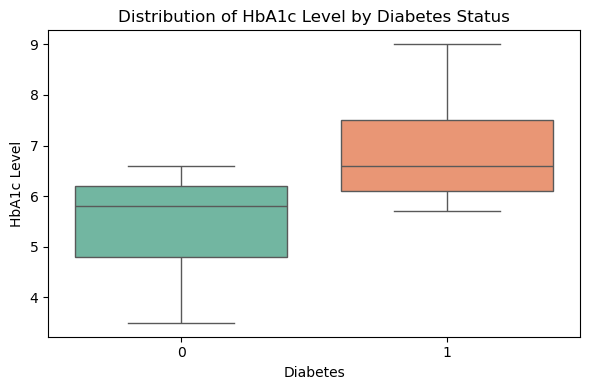

In [38]:
#HbA1c vs Diabetes
plt.figure(figsize=(6, 4))
sns.boxplot(data=cleaned_df, x='diabetes', y='HbA1c_level', palette='Set2')
plt.title('Distribution of HbA1c Level by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.tight_layout()
plt.savefig("HbA1c_by_Diabetes_Boxplot.png", dpi=300)  # Save as high-res image
plt.show()


### Narration
Observation:

Diabetics have higher HbA1c levels.

Median HbA1c for diabetics is above 6.5 — consistent with diagnostic criteria for diabetes.

Very little overlap between the two groups.

Interpretation:

HbA1c is a strong indicator of diabetes status.

This plot clearly shows that higher HbA1c levels are tightly linked to having diabetes — it may be one of the most distinguishing features in your dataset.


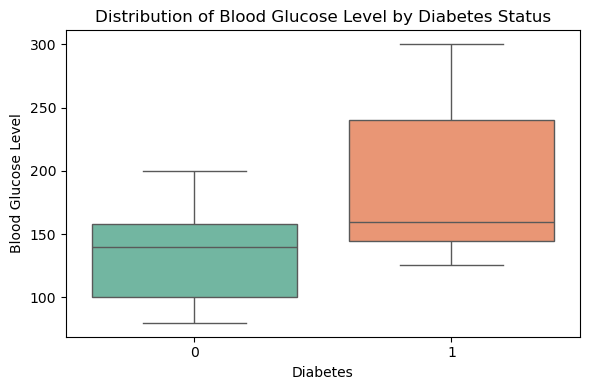

In [39]:
# Blood Glucose Level by Diabetes Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=cleaned_df, x='diabetes', y='blood_glucose_level', palette='Set2')
plt.title('Distribution of Blood Glucose Level by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.tight_layout()
plt.savefig("Glucose_by_Diabetes_Boxplot.png", dpi=300)  # Export image
plt.show()


### Narration 
Observation:
Diabetics have higher blood glucose levels overall.

Median blood glucose for diabetics is noticeably higher than non-diabetics.

The distribution for diabetics is wider, indicating more variability in glucose levels.

Interpretation:
Blood glucose level is a strong differentiator between diabetic and non-diabetic individuals.

The clear separation and higher values among diabetics suggest it’s a key feature related to diabetes in your dataset.

In [40]:
numerical_features = cleaned_df.select_dtypes(include=['number'])
numerical_features

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,cleaned_age
0,80.0,0,1,25.19,6.6,140,0,80
1,54.0,0,0,27.32,6.6,80,0,54
2,28.0,0,0,27.32,5.7,158,0,28
3,36.0,0,0,23.45,5.0,155,0,36
4,76.0,1,1,20.14,4.8,155,0,76
...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,36
99996,2.0,0,0,17.37,6.5,100,0,2
99997,66.0,0,0,27.83,5.7,155,0,66
99998,24.0,0,0,35.42,4.0,100,0,24


### Narration
Summary of Bivariate Analysis on Diabetes Dataset
Blood Glucose:

Diabetics show significantly higher and more variable blood glucose levels than non-diabetics.

Blood glucose is a strong differentiator and key feature related to diabetes status.

HbA1c Levels:

Diabetics have notably higher HbA1c levels, with median values above the diagnostic threshold (6.5).

Very little overlap with non-diabetics, making HbA1c one of the most distinctive indicators of diabetes.

BMI:

Diabetics have a higher median BMI and greater variability.

Non-diabetics include some extreme BMI outliers, but generally less spread.

Higher BMI is associated with diabetes but some high-BMI individuals remain non-diabetic, suggesting protective factors.

Age:

Diabetics are mostly older adults (median ~65 years) with a narrower age range.

Non-diabetics span a wider age range with a lower median age (~40 years).

Young diabetic outliers (ages 5-25) likely represent Type 1 diabetes cases.
Categorical Variables:

Gender: Diabetes prevalence is roughly balanced between males and females, slightly more males affected.

Smoking History: Most diabetics have never smoked; smoking has a less direct link to diabetes here.

Age Groups: Highest diabetes prevalence in seniors (60-74) and elderly (75+).

Heart Disease & Hypertension: More common in diabetics, indicating strong comorbidity with diabetes.

Overall Interpretation:
Blood glucose and HbA1c levels are the strongest individual predictors of diabetes. Higher BMI and older age also strongly associate with diabetes, alongside common comorbidities like heart disease and hypertension. Smoking appears less directly linked in this dataset. These findings highlight important factors for diabetes risk assessment and screening, especially focusing on older adults and metabolic markers.

## Multivariate Analysis

In [41]:
cleaned_df.drop('age', axis=1, inplace=True)

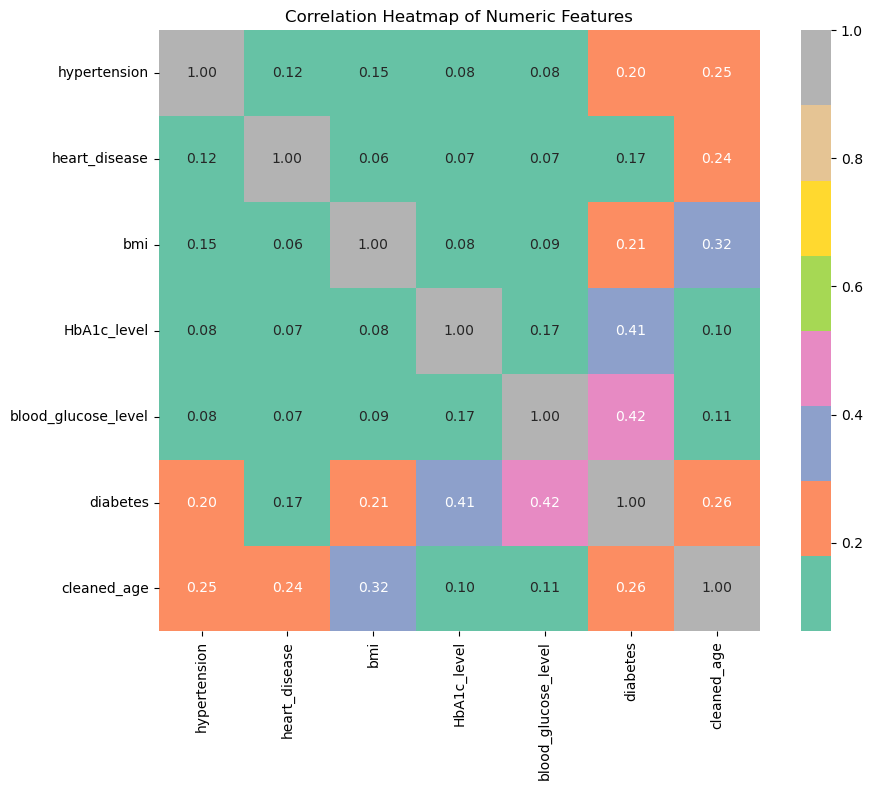

In [42]:
# Correlations
# Get the Set2 palette and convert it to a diverging colormap
palette = sns.color_palette("Set2", as_cmap=True)

plt.figure(figsize=(10, 8))

# Filter numeric columns only
numeric_df = cleaned_df.select_dtypes(include=['int64', 'float64'])

# Create the heatmap
hm = sns.heatmap(numeric_df.corr(),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 cmap=palette)

plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.savefig("Correlation_Heatmap.png", dpi=300)  # Save high-res image
plt.show()


### Narration
Observations:
Blood glucose level shows the strongest correlation with diabetes (0.42).
This is higher than any other feature in the dataset.

HbA1c level has the second-highest correlation with diabetes (0.41).
Both glucose-related measures are clearly linked to the condition.

Age has a moderate correlation with diabetes (0.26).This indicates older individuals are more likely to be diabetic.

Hypertension correlates weakly with heart disease (0.12), and both have weak links to diabetes (0.20 and 0.17 respectively).This suggests some shared health risks, though not highly predictive individually.

BMI correlates weakly with diabetes (0.21), suggesting it plays a supporting role in diabetes risk, but is not as strong as glucose indicators.

Interpretation:
Blood sugar indicators (HbA1c and glucose) are the most reliable predictors of diabetes, aligning with clinical standards for diagnosis.

Age and BMI contribute to risk, but with less predictive power individually. Their effects may be moderated by other health or lifestyle factors.

The weak correlation between hypertension, heart disease, and diabetes suggests they might be comorbid conditions, but not strong predictors in this dataset alone.

In [43]:
cleaned_df.columns

Index(['gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes', 'cleaned_age',
       'age_group'],
      dtype='object')

In [44]:
cleaned_df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

## Data prepocessing & Features Engineering 

In [45]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

le = LabelEncoder()
chi2_results = []

categorical_df = cleaned_df.select_dtypes(include=['object', 'category'])

for col in categorical_df.columns:
    cleaned_df[col + '_encoded'] = le.fit_transform(cleaned_df[col].astype(str))
    contingency = pd.crosstab(cleaned_df[col + '_encoded'], cleaned_df['diabetes'])
    chi2, p, dof, _ = chi2_contingency(contingency)
    chi2_results.append((col, chi2, p))

chi2_results = sorted(chi2_results, key=lambda x: x[1], reverse=True)

print("Chi-square test results:")
for col, chi2_stat, p_val in chi2_results:
    print(f"{col}: chi2 = {chi2_stat:.2f}, p = {p_val:.4f}")

Chi-square test results:
age_group: chi2 = 6939.20, p = 0.0000
smoking_history: chi2 = 1514.21, p = 0.0000
gender: chi2 = 139.39, p = 0.0000


### Narration (Categorical Features)
The Chi-Square test revealed that all three categorical variables have a statistically significant association with diabetes status (p < 0.05):
Age Group* (χ² = 6939.20): Very strong association — diabetes is more prevalent in older age groups.
Smoking History* (χ² = 1514.21): Strong relationship — smoking status is linked to diabetes risk.
Gender* (χ² = 139.39): Statistically significant but weaker association compared to age and smoking.

age group, smoking history, and gender are important categorical features for predicting diabetes.

In [46]:
#Select relevant features
selected_features = [
    'HbA1c_level',           # numeric
    'blood_glucose_level',   # numeric
    'bmi',                   # numeric
    'cleaned_age',           # numeric
    'gender',                # categorical
    'smoking_history',       # categorical
    'hypertension',          # binary (0/1)
    'heart_disease'          # binary (0/1)
]

X=cleaned_df[selected_features]
y=cleaned_df['diabetes']

In [47]:
from sklearn.preprocessing import StandardScaler
import joblib

# Select only the numeric features 
numeric_cols = ['HbA1c_level', 'blood_glucose_level', 'bmi', 'cleaned_age']
X_numeric = cleaned_df[numeric_cols]

# Train the scaler only on these 4 columns
scaler = StandardScaler()
scaler.fit(X_numeric)

# Save the scaler
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

In [48]:
# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True)

In [49]:
# Scale numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['HbA1c_level', 'blood_glucose_level', 'bmi', 'cleaned_age']

X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

In [50]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (76916, 11)
X_test shape: (19230, 11)
y_train distribution:
 diabetes
0    0.911774
1    0.088226
Name: proportion, dtype: float64
y_test distribution:
 diabetes
0    0.911804
1    0.088196
Name: proportion, dtype: float64


In [51]:
#Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # For ROC-AUC


In [52]:
#Evaluate the Model

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#ROC-AUC Score
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {auc:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17534
           1       0.42      0.88      0.57      1696

    accuracy                           0.88     19230
   macro avg       0.71      0.88      0.75     19230
weighted avg       0.94      0.88      0.90     19230

Confusion Matrix:
 [[15515  2019]
 [  205  1491]]
ROC-AUC Score: 0.9598


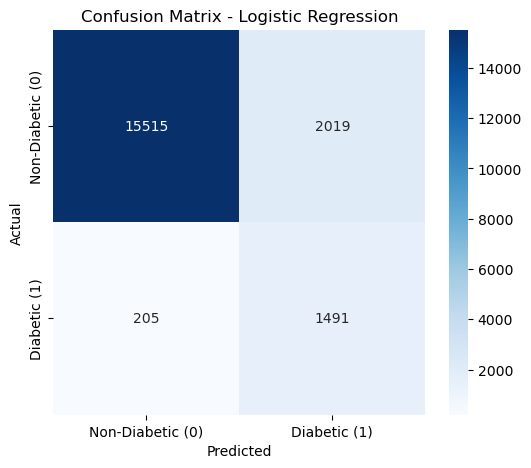

In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels
labels = ['Non-Diabetic (0)', 'Diabetic (1)']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [54]:
# List of classifiers
classifiers = [
    [XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 'XGB Classifier'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
    [SGDClassifier(max_iter=1000, tol=1e-3, random_state=42), 'SGD Classifier'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(max_iter=1000, random_state=42), 'Logistic Regression']
]

results = []
for clf, name in classifiers:
    print(f"Training {name}...")
    
    # Fit model
    clf.fit(X_train, y_train)
    
    # Predict labels and probabilities
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        # For classifiers without predict_proba (e.g. SGD or SVC sometimes), use decision_function and convert
        try:
            decision_scores = clf.decision_function(X_test)
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            y_proba = scaler.fit_transform(decision_scores.reshape(-1,1)).ravel()
        except:
            # If all else fails, fallback to predictions (less ideal for ROC AUC)
            y_proba = y_pred
# Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })


results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)

print("\nModel performance comparison:\n")
print(results_df)

Training XGB Classifier...
Training Random Forest...
Training K-Nearest Neighbours...
Training SGD Classifier...
Training Naive Bayes...
Training Decision Tree...
Training Logistic Regression...

Model performance comparison:

                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        XGB Classifier  0.969683   0.950607  0.692217  0.801092  0.976130
6   Logistic Regression  0.959490   0.867094  0.638561  0.735484  0.959641
1         Random Forest  0.969683   0.947707  0.694575  0.801633  0.958976
3        SGD Classifier  0.956266   0.802120  0.669222  0.729669  0.958678
4           Naive Bayes  0.609568   0.180519  0.968160  0.304299  0.912814
2  K-Nearest Neighbours  0.959542   0.885067  0.622052  0.730609  0.906172
5         Decision Tree  0.950130   0.705292  0.746462  0.725294  0.859732


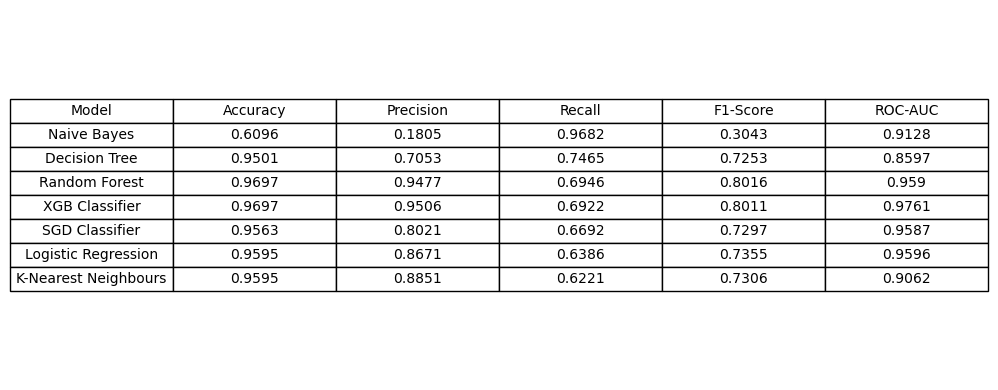

In [55]:
# Your results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)

# Plot as a table image
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
tbl = ax.table(
    cellText=results_df.round(4).values,
    colLabels=results_df.columns,
    cellLoc='center',
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("model_comparison_table.png", dpi=300)  # Save the image
plt.show()

In [56]:
results_df.to_excel("model_comparison.xlsx", index=False)

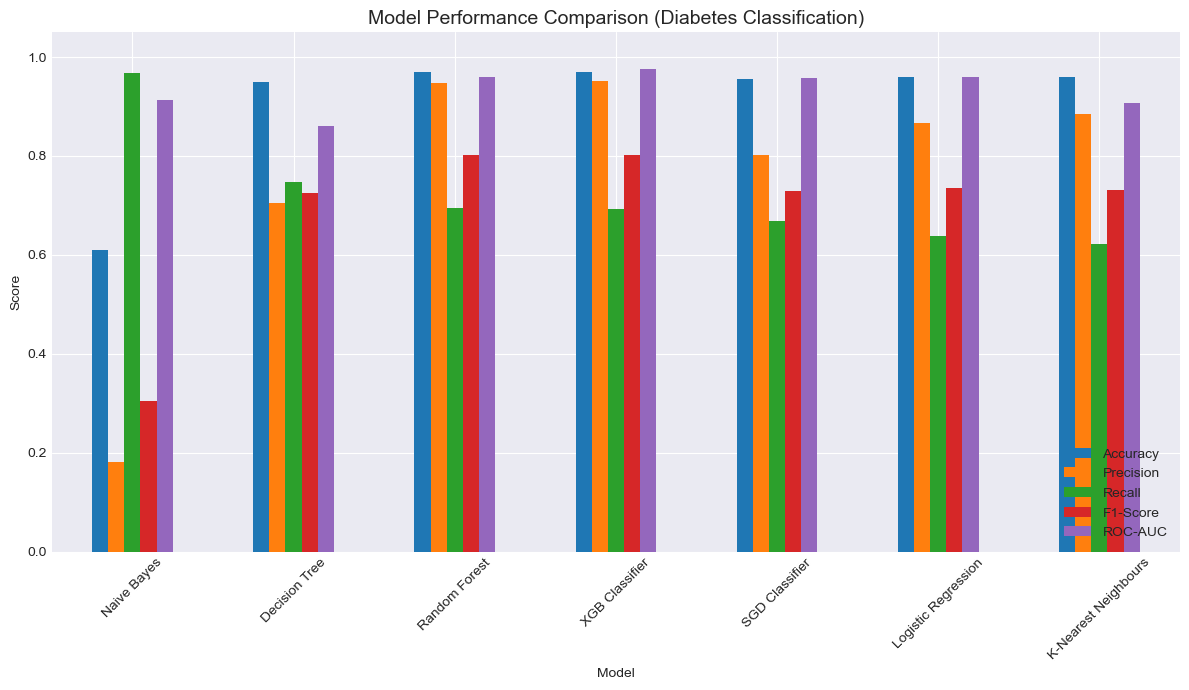

In [57]:
# Let's visualize the metrics 
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot ROC-AUC comparison
results_df.plot(kind='bar', x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'], ax=ax)

plt.title("Model Performance Comparison (Diabetes Classification)", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

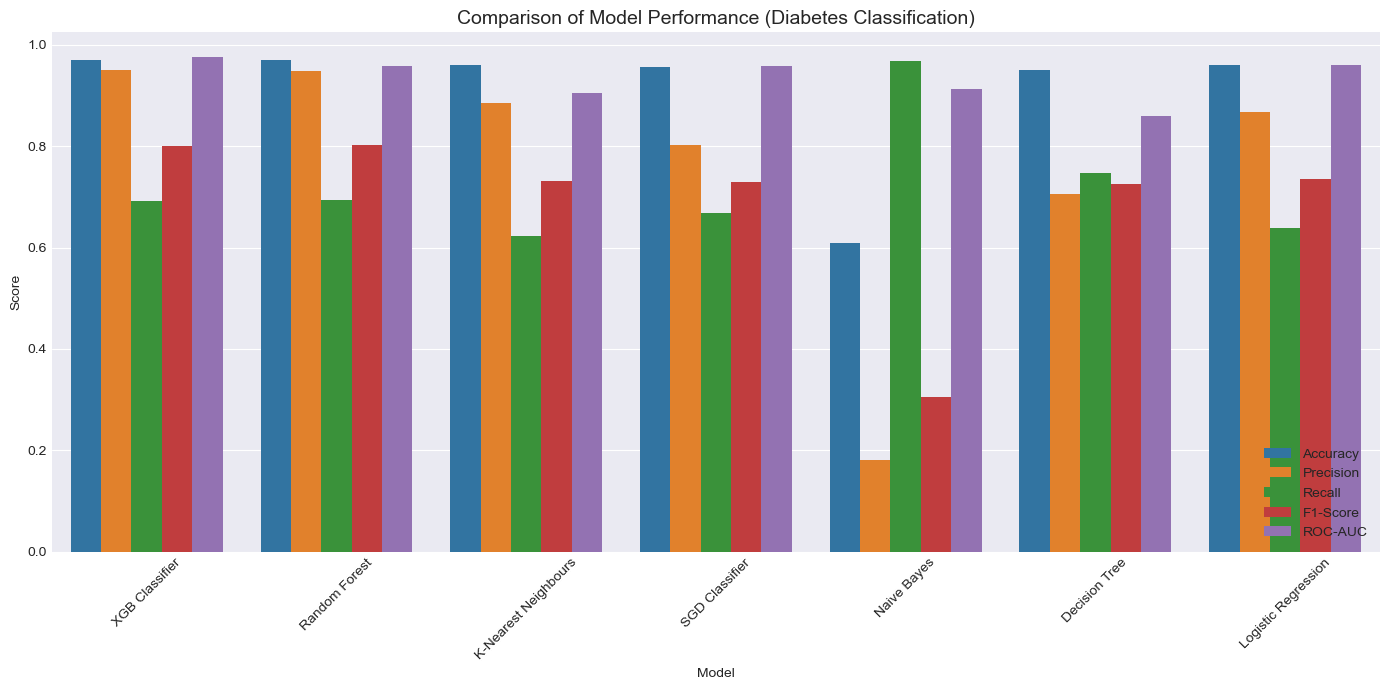

In [58]:
# Model performance 
model_results = pd.DataFrame({
    'Model': [
        'XGB Classifier', 'Random Forest', 'K-Nearest Neighbours',
        'SGD Classifier', 'Naive Bayes', 'Decision Tree', 'Logistic Regression'
    ],
    'Accuracy': [0.969683, 0.969683, 0.959542, 0.956266, 0.609568, 0.950130, 0.959490],
    'Precision': [0.950607, 0.947707, 0.885067, 0.802120, 0.180519, 0.705292, 0.867094],
    'Recall': [0.692217, 0.694575, 0.622052, 0.669222, 0.968160, 0.746462, 0.638561],
    'F1-Score': [0.801092, 0.801633, 0.730609, 0.729669, 0.304299, 0.725294, 0.735484],
    'ROC-AUC': [0.976130, 0.958976, 0.906172, 0.958678, 0.912814, 0.859732, 0.959641]
})

# Reshape the DataFrame for Seaborn barplot
melted = pd.melt(model_results, id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=melted, x='Model', y='Score', hue='Metric')
plt.title("Comparison of Model Performance (Diabetes Classification)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("Model_Performance_Comparison.png", dpi=300)  # Export as high-resolution PNG
plt.show()


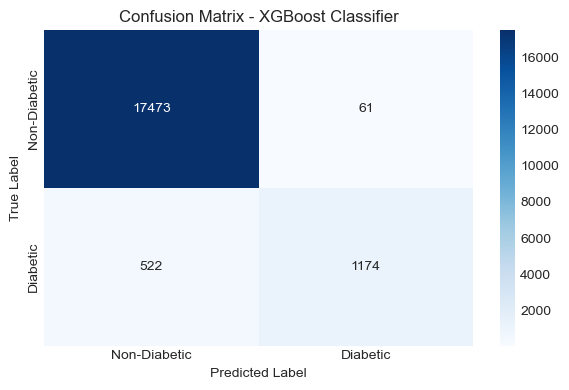

In [59]:
# Fit the XGBoost classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Non-Diabetic', 'Diabetic']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.tight_layout()
plt.savefig("XGBoost_Confusion_Matrix.png", dpi=300)  # Save high-res image
plt.show()


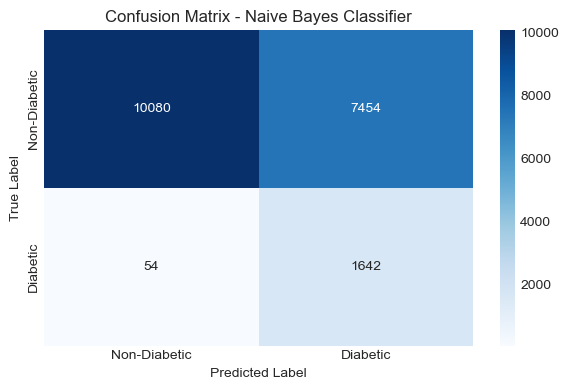

In [60]:
# Fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Generate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
labels = ['Non-Diabetic', 'Diabetic']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.tight_layout()
plt.savefig("NaiveBayes_Confusion_Matrix.png", dpi=300)  # Save image
plt.show()


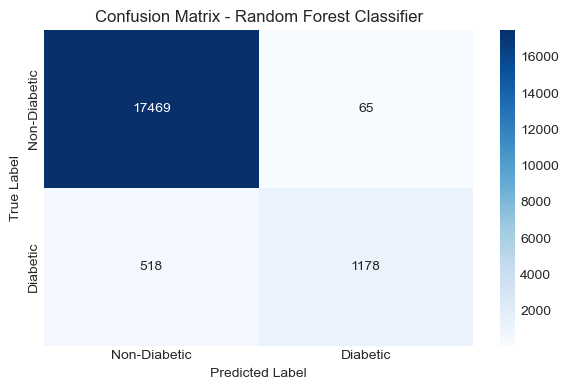

In [61]:
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = ['Non-Diabetic', 'Diabetic']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.tight_layout()
plt.savefig("RandomForest_Confusion_Matrix.png", dpi=300)  # Save image
plt.show()


In [62]:
# Let's check and assign Best Model 
best_model = None
best_auc = 0

results = []
for clf, name in classifiers:
    print(f"Training {name}...")
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        try:
            decision_scores = clf.decision_function(X_test)
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            y_proba = scaler.fit_transform(decision_scores.reshape(-1, 1)).ravel()
        except:
            y_proba = y_pred

    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    # Update best model if current AUC is higher
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_model = clf  # Store the model instance

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)

print("\nModel performance comparison:\n")
print(results_df)


Training XGB Classifier...
Training Random Forest...
Training K-Nearest Neighbours...
Training SGD Classifier...
Training Naive Bayes...
Training Decision Tree...
Training Logistic Regression...

Model performance comparison:

                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        XGB Classifier  0.969683   0.950607  0.692217  0.801092  0.976130
6   Logistic Regression  0.959490   0.867094  0.638561  0.735484  0.959641
1         Random Forest  0.969683   0.947707  0.694575  0.801633  0.958976
3        SGD Classifier  0.956266   0.802120  0.669222  0.729669  0.958678
4           Naive Bayes  0.609568   0.180519  0.968160  0.304299  0.912814
2  K-Nearest Neighbours  0.959542   0.885067  0.622052  0.730609  0.906172
5         Decision Tree  0.950130   0.705292  0.746462  0.725294  0.859732


### Narration
Naive Bayes has the highest recall (0.968) but very low precision (0.18) and accuracy (0.61), which makes it risky—it flags nearly everyone as diabetic.

Recommendation:
CRandom Forest or XGBoost have the best trade-off:

Recall is high (~0.69) → minimizes false negatives

Precision and Accuracy are both high → avoids over-predicting diabetes

F1-score balances both Recall and Precision

ROC-AUC is highest in XGBoost → it separates classes very well

Final Choice:
 XGBoost Classifier is your best model due to:

High recall (0.6922)

Excellent ROC-AUC (0.9761) → Strong discriminatory power

Balanced performance across all metrics

In [63]:
# Save the model
#import joblib
#joblib.dump(scaler, "scaler.joblib")

In [64]:
from joblib import dump
from xgboost import XGBClassifier

# Example: train the model (if not already done)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Save the model
dump(model, 'diabetes_xgb_model.joblib')


['diabetes_xgb_model.joblib']

In [65]:
model = joblib.load("diabetes_xgb_model.joblib")
print(model.feature_names_in_)

['HbA1c_level' 'blood_glucose_level' 'bmi' 'cleaned_age' 'hypertension'
 'heart_disease' 'gender_Male' 'gender_Other' 'smoking_history_former'
 'smoking_history_never' 'smoking_history_unknown']


In [66]:
joblib.dump(X_encoded.columns.tolist(), "model_columns.joblib")

['model_columns.joblib']